In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dll-logs/dll_logs.csv


Store file path in a variable to use when converting file to Dataframe

In [2]:
url_path = "../input/dll-logs/dll_logs.csv"

dll_logs = pd.read_csv(url_path)

dll_logs.head(10) 
#Shows Columns and first 10 rows of data 

,FullName,CreationTime,LastWriteTime,Length
0,C:\Program Files\Adobe\Adobe Creative Cloud\AC...,5/6/2021 6:41:43 AM,5/6/2021 6:41:43 AM,443056
1,C:\Program Files\Adobe\Adobe Creative Cloud\CC...,5/6/2021 6:41:43 AM,5/6/2021 6:41:43 AM,966328
2,C:\Program Files\Adobe\Adobe Creative Cloud\Ex...,5/6/2021 6:41:43 AM,4/21/2021 9:04:53 PM,200880
3,C:\Program Files\Adobe\Adobe Creative Cloud\Ex...,5/6/2021 6:41:43 AM,4/21/2021 9:04:53 PM,23210680
4,C:\Program Files\Adobe\Adobe Creative Cloud\Ex...,5/6/2021 6:41:43 AM,4/21/2021 9:04:53 PM,511672
5,C:\Program Files\Adobe\Adobe Creative Cloud Ex...,5/5/2021 6:26:55 AM,5/5/2021 6:26:55 AM,221976
6,C:\Program Files\Adobe\Adobe Creative Cloud Ex...,5/5/2021 6:26:55 AM,5/5/2021 6:26:55 AM,129304
7,C:\Program Files\Adobe\Adobe Creative Cloud Ex...,5/5/2021 6:26:55 AM,5/5/2021 6:26:55 AM,1300248
8,C:\Program Files\Adobe\Adobe Creative Cloud Ex...,5/5/2021 6:26:55 AM,5/5/2021 6:26:55 AM,909592
9,C:\Program Files\Adobe\Adobe Creative Cloud Ex...,5/5/2021 6:26:55 AM,5/5/2021 6:26:55 AM,656664


To ensure that we avoid using duplicate entries, we group them by their full path name.

In [3]:
Paths = dll_logs.groupby("FullName").FullName.count()
Paths.sort_values()


FullName
C:\Program Files (x86)\Adobe\Adobe Creative Cloud\Utils\npAdobeAAMDetect32.dll                                                     1
C:\Windows\WinSxS\amd64_microsoft-onecore-codeintegrity-secure_31bf3856ad364e35_10.0.22000.434_none_8c43b0ca0d905272\f\skci.dll    1
C:\Windows\WinSxS\amd64_microsoft-onecore-codeintegrity-secure_31bf3856ad364e35_10.0.22000.434_none_8c43b0ca0d905272\r\skci.dll    1
C:\Windows\WinSxS\amd64_microsoft-onecore-codeintegrity-secure_31bf3856ad364e35_10.0.22000.434_none_8c43b0ca0d905272\skci.dll      1
C:\Windows\WinSxS\amd64_microsoft-onecore-codeintegrity-secure_31bf3856ad364e35_10.0.22000.469_none_8c2842780da424f8\f\skci.dll    1
                                                                                                                                  ..
C:\Program Files\Git\usr\lib\perl5\vendor_perl\auto\SVN\_Client\_Client.dll                                                        1
C:\Program Files\Git\usr\lib\perl5\vendor_perl\auto\SVN\_Cor

We then split the full path into individual folder, file, program, etc.. to analyze frequency. 

In [4]:
path_details = dll_logs.FullName.str.split( pat="\\" ,expand=True)

path_details.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
34970,C:,Windows,TempInst,.net,installer,3ninmlrq.n00,fr,WindowsFormsIntegration.resources.dll,None,None,None,None,None,None,None,None,None
15083,C:,Program Files (x86),Microsoft Visual Studio,2019,Community,Common7,IDE,Extensions,xjyqcfhk.anw,it,Microsoft.VisualStudio.Docker.DotNetCore.resou...,None,None,None,None,None,None
17750,C:,Program Files (x86),Microsoft Visual Studio,Installer,resources,app,ServiceHub,Services,Microsoft.Developer.IdentityService,zh-Hant,Microsoft.ServiceHub.Resources.dll,None,None,None,None,None,None
50480,C:,Windows,WinSxS,wow64_presentationcore_31bf3856ad364e35_4.0.15...,PresentationCore.dll,None,None,None,None,None,None,None,None,None,None,None,None
7444,C:,Program Files (x86),Microsoft,EdgeWebView,Application,97.0.1072.76,wns_push_client.dll,None,None,None,None,None,None,None,None,None,None
36486,C:,Windows,WinSxS,amd64_microsoft-onecore-u..latform-updateagent...,r,UpdateAgent.dll,None,None,None,None,None,None,None,None,None,None,None
40655,C:,Windows,WinSxS,amd64_microsoft-windows-migrationengine_31bf38...,r,migcore.dll,None,None,None,None,None,None,None,None,None,None,None
37188,C:,Windows,WinSxS,amd64_microsoft-windows-bcp47languages_31bf385...,BCP47Langs.dll,None,None,None,None,None,None,None,None,None,None,None,None
46090,C:,Windows,WinSxS,msil_microsoft.security...ymanagement.cmdlets_...,Microsoft.Security.ApplicationId.PolicyManagem...,None,None,None,None,None,None,None,None,None,None,None,None
335,C:,Program Files,Adobe,Adobe Media Encoder 2021,VulcanControl.dll,None,None,None,None,None,None,None,None,None,None,None,None


Lets take a closer look at the frequency of the name of the programs by isolating the first unique column in the Dataframe and observing the frequency chart. 

In [5]:
root_file = path_details.groupby(1)[1].count()
root_file.sort_values()


1
Python39                  27
Users                   1417
Program Files           5838
Program Files (x86)    16360
Windows                27895
Name: 1, dtype: int64

Lets store the bar graph of the frequency distribution to visualize the environment a little bit easier

array([<AxesSubplot:title={'center':'1'}, xlabel='1'>], dtype=object)

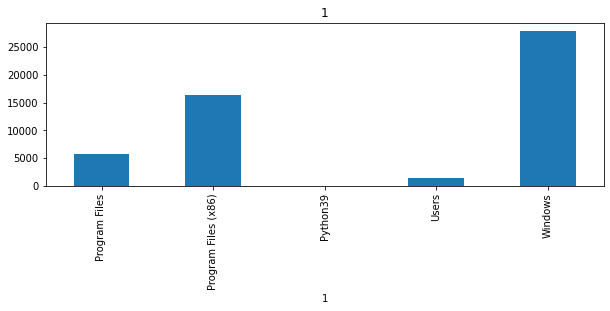

In [6]:
rootbar = root_file.plot.bar(figsize=(10,3), subplots=True)

rootbar

We are going to repeat the previous step to the next column to get a deeper look at some of the services within our distinct root folders. 

In [7]:
services = path_details.groupby(2)[2].count()
services_list = services.sort_values()
services_list


2
PrintDialog                    1
twain_32.dll                   1
python39.dll                   1
python3.dll                    1
pyshellext.amd64.dll           1
                           ...  
SysWOW64                    2800
dotnet                      2916
System32                    5013
Microsoft Visual Studio    12137
WinSxS                     15784
Name: 2, Length: 75, dtype: int64

array([<AxesSubplot:title={'center':'2'}, xlabel='2'>], dtype=object)

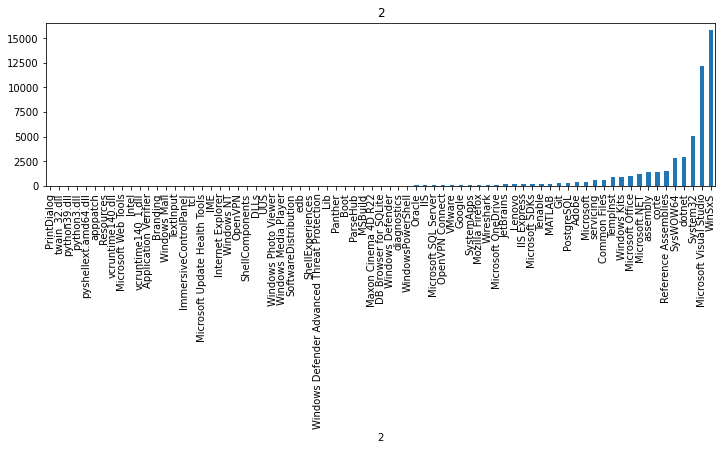

In [8]:
servicesbar = services_list.plot.bar(figsize=(12,3), subplots=True)

servicesbar

Grouping it by created times and last used times will help us analyze the user activity and potentially outdated services

In [9]:

created_times = dll_logs.groupby("CreationTime").CreationTime.count()
created_times


CreationTime
1/1/2018 12:55:44 PM     1
1/10/2019 1:51:56 PM     1
1/10/2019 9:16:30 PM     1
1/10/2022 7:54:08 AM     1
1/10/2022 7:54:09 AM     1
                        ..
9/7/2017 11:16:52 PM    50
9/7/2017 11:17:02 PM    19
9/7/2017 11:17:04 PM    31
9/7/2017 11:17:14 PM    50
9/7/2017 11:17:32 PM    40
Name: CreationTime, Length: 4165, dtype: int64

In [10]:
lastused_time = dll_logs.groupby("LastWriteTime").LastWriteTime.count()
lastused_time.head()

LastWriteTime
1/10/2019 1:51:56 PM    1
1/10/2019 9:16:30 PM    1
1/10/2022 7:54:08 AM    1
1/10/2022 7:54:09 AM    1
1/10/2022 7:54:15 AM    1
Name: LastWriteTime, dtype: int64

Taking it a step further,  we can seperate time by date, hourly time and time of day

In [11]:
created_logs = pd.DataFrame()
created_logs = dll_logs.CreationTime.str.split(expand=True)
created_logs = created_logs.rename(columns={0:'created_date', 1:'created_time', 2:'time_of_day'})
created_logs.head()


,created_date,created_time,time_of_day
0,5/6/2021,6:41:43,AM
1,5/6/2021,6:41:43,AM
2,5/6/2021,6:41:43,AM
3,5/6/2021,6:41:43,AM
4,5/6/2021,6:41:43,AM


This will let us analyze the frequency for activity cycles

In [12]:

created_freq = pd.DataFrame(pd.to_datetime(created_logs["created_date"]))


created_freq.head()

,created_date
0,2021-05-06
1,2021-05-06
2,2021-05-06
3,2021-05-06
4,2021-05-06


<AxesSubplot:xlabel='created_date'>

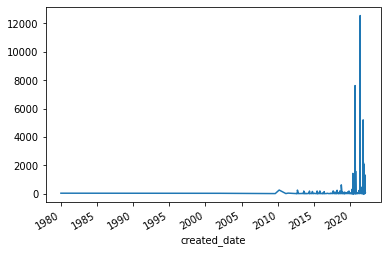

In [13]:
created_frequencies = created_freq.groupby('created_date').created_date.count()
created_frequencies.plot()



In [14]:
created_frequencies

created_date
1979-12-31      28
2002-02-01      21
2009-08-31       1
2010-03-18     251
2011-02-09       2
              ... 
2022-02-08      41
2022-02-09     115
2022-02-11    1308
2022-02-12      95
2022-02-17      88
Name: created_date, Length: 355, dtype: int64

In [15]:
last_logs = pd.DataFrame()
last_logs = dll_logs.LastWriteTime.str.split(expand=True)
last_logs = last_logs.rename(columns={0:'last_date', 1:'last_time', 2:'time_of_day'})
last_logs.head()

,last_date,last_time,time_of_day
0,5/6/2021,6:41:43,AM
1,5/6/2021,6:41:43,AM
2,4/21/2021,9:04:53,PM
3,4/21/2021,9:04:53,PM
4,4/21/2021,9:04:53,PM


In [16]:

last_freq = pd.DataFrame(pd.to_datetime(last_logs["last_date"]))


last_freq.head()

,last_date
0,2021-05-06
1,2021-05-06
2,2021-04-21
3,2021-04-21
4,2021-04-21


In [17]:
last_frequencies = last_freq.groupby('last_date').last_date.count()
last_frequencies



last_date
1979-12-31     28
2002-02-01     21
2009-08-31      1
2010-03-18    251
2011-02-09      2
             ... 
2022-02-09    115
2022-02-10     76
2022-02-11    574
2022-02-12     19
2022-02-15     76
Name: last_date, Length: 414, dtype: int64

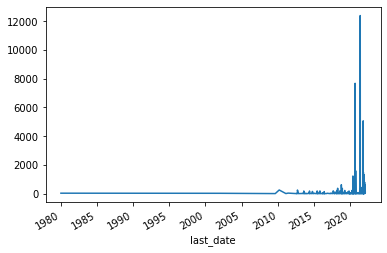

In [18]:
last_frequenciesBar = last_frequencies.plot()